In [778]:
from numpy import *
from pylab import *

In [779]:
data=loadtxt('C:/Users/sony/Desktop/data1.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]

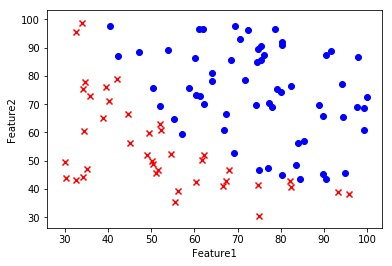

In [780]:
######图像展示
pos = where(y == 1)  
neg = where(y == 0)  
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')  
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')  
xlabel('Feature1')  
ylabel('Feature2')
show() 

In [781]:
#####sigmoid函数
def sigmoid(X):
    a=1.0+e**(-X)
    z=1.0/a
    return z

In [782]:
######代价函数
def compute_cost(theta,X,y):
    m=X.shape[0]
    J=0
    
    h=sigmoid(X.dot(theta))
    J=(-1.0/m)*(transpose(y).dot(log(h))+transpose(1.0-y).dot(log(1.0-h)))
    return J  

In [783]:
##########梯度下降
def compute_grad(theta,X,y,alpha,iters):
    m=X.shape[0]
    
    J_history=zeros([iters,1])
    
    for i in range(iters):
        h=sigmoid(X.dot(theta))
        grad=np.dot(np.transpose(X),h-y)/m
        theta=theta-alpha*grad
        
        J_history[i]=compute_cost(theta,X,y)

    return theta,J_history      

theta： [[-4.81180027]
 [ 0.04528064]
 [ 0.03819149]]


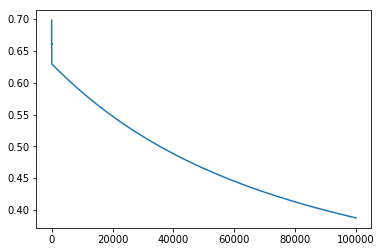

In [784]:
#########输入数据
theta=zeros([X.shape[1]+1,1])
X=concatenate((ones([X.shape[0],1]),X),axis=1)
y=y[:,newaxis]
alpha=10**(-3)
iters=100000
result=compute_grad(theta,X,y,alpha,iters)
theta=result[0]
print("theta：",theta)
plot(result[1])
show()

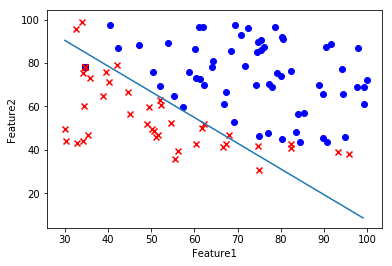

In [785]:
##########图形展示
pos = where(y == 1)  
neg = where(y == 0)  
scatter(X[pos, 1], X[pos, 2], marker='o', c='b')  
scatter(X[neg, 1], X[neg, 2], marker='x', c='r')  
xlabel('Feature1')  
ylabel('Feature2') 

a=arange(30,100,1)
b = (-theta[0]-theta[1]*a)/theta[2]  # x2 = f(x1)
plot(a,b)
show() 

In [786]:
########测试准确率
def predict(theta, X):  
    m, n = X.shape  
    p = zeros(shape=(m,1))  
    h = sigmoid(X.dot(theta))  
    for i in range(m):  
        if h[i]>0.5:  
            p[i]=1  
        else:  
            p[i]=0  
    return p   

p = predict(theta,X)

print('Train Accuracy: %f%',(y[where(p == y)].size / float(y.size))*100.0) 

Train Accuracy: %f% 91.0


In [787]:
###############划分样本后进行计算
X1=X[0:60,:]
X2=X[60:100,:]

y1=y[0:60,:]
y2=y[60:100,:]

theta： [[-4.86972072]
 [ 0.04974087]
 [ 0.03029091]]


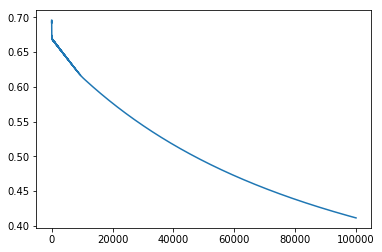

In [788]:
####训练
theta=zeros([X1.shape[1],1])
alpha=10**(-3)
iters=100000

result=compute_grad(theta,X1,y1,alpha,iters)
theta=result[0]
print("theta：",theta)
plot(result[1])
show()

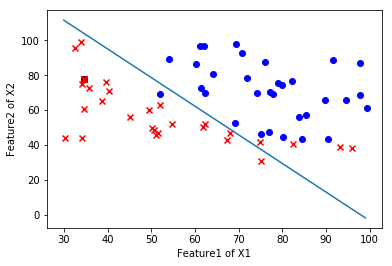

In [789]:
##########图形展示
pos = where(y1== 1)  
neg = where(y1== 0)  
scatter(X1[pos, 1], X1[pos, 2], marker='o', c='b')  
scatter(X1[neg, 1], X1[neg, 2], marker='x', c='r')  
xlabel('Feature1 of X1')  
ylabel('Feature2 of X2') 

a=arange(30,100,1)
b = (-theta[0]-theta[1]*a)/theta[2]  # x2 = f(x1)
plot(a,b)
show() 

In [790]:
####测试准确率
p = predict(theta,X2)

print('Train Accuracy: %f%',(y2[where(p == y2)].size / float(y2.size))*100.0)  

Train Accuracy: %f% 87.5
